Sorted x : [113.2, 115.2, 115.3, 115.5, 115.9, 116.2, 117, 117.2, 117.8, 118.5, 118.5, 118.5, 118.5, 120, 120.5, 120.5, 120.5, 120.6, 120.6, 120.7]
median = 118.5
16
20
['+', '-', '+', '+', '-', '-', '-', '+', '+', '-', '-', '-', '-', '-', '+', '+']
7
5
7 6
5 7
Гипотеза о неизменности среднего значения временного ряда отвергается, т.е. тренд есть


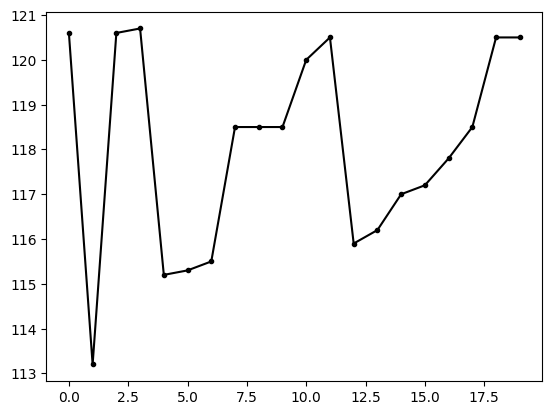

In [10]:
# Метод основанный на медианах

import math
import matplotlib.pyplot as plt


def countSeries(x: list) -> int:
    count = 1
    for i in range(len(x)-1):
        if x[i] != x[i+1]:
            count += 1
    return count


def longer_series(x: list) -> int:
    longer = 1
    for i in range(len(x)-1):
        temp = 0
        if x[i] == x[i+1]:
            temp = 2
            i += 1
            while i < len(x)-1 and x[i] == x[i+1]:
                temp += 1
                i += 1
            if temp > longer:
                longer = temp
    return longer


def median(x: list) -> float:
    sortedX = sorted(x)
    print("Sorted x :",sortedX)
    if (len(x) % 2 == 1):
        median = sortedX[(len(x)+1)//2-1]
    else:
        median = 0.5*(sortedX[len(x)//2-1]+sortedX[len(x)//2+1-1])
    print("median =", median)
    return median


def create_pos_neg_list(x: list) -> list:
    med = median(x)
    posNeg = []
    for i in range(len(x)):
        if (x[i] > med):
            posNeg.append("+")
        elif (x[i] < med):
            posNeg.append("-")
        #else:
            #print("x[i]=med")
    print(len(posNeg))
    print(len(x))
    return posNeg


def criterion(v: int, k: int, n: int):
    f1 = int(0.5*(n+2-1.96*math.sqrt(n-1)))
    f2 = int(3.3*(math.log10(n)+1))
    print(v, f1, sep=" ")
    print(k, f2, sep=" ")
    if v < f1 or k > f2:
        return True
    else:
        return False


x = [120.6, 113.2,  120.6, 120.7, 115.2, 115.3, 115.5,  118.5, 118.5,
     118.5, 120, 120.5, 115.9, 116.2, 117, 117.2, 117.8, 118.5, 120.5, 120.5]
#x = [14.1, 9.3, 19.4, 19.7, 5.4, 24.2, 13.8, 24.5]
posNeg = create_pos_neg_list(x)

v = countSeries(posNeg)
kMax = longer_series(posNeg)
n = len(x)

print(posNeg, v, kMax, sep="\n")
if (criterion(v, kMax, n) == True):
    print("Гипотеза о неизменности среднего значения временного ряда принимается, т.е. тренда нет")
else:
    print("Гипотеза о неизменности среднего значения временного ряда отвергается, т.е. тренд есть")

plt.plot([i for i in range(len(x))], x, "k-",
         [i for i in range(len(x))],x, "k.")
plt.show()


[120.6, 113.2, 120.6, 120.7, 115.2, 115.3, 115.5, 118.5, 118.5, 118.5, 120, 120.5, 115.9, 116.2, 117, 117.2, 117.8, 118.5, 120.5, 120.5]
['-', '+', '+', '-', '+', '+', '+', '+', '+', '-', '+', '+', '+', '+', '+', '+']
9.475631498646411
6 9
6 5
Гипотеза о неизменности среднего значения временного ряда отвергается, т.е. тренд есть


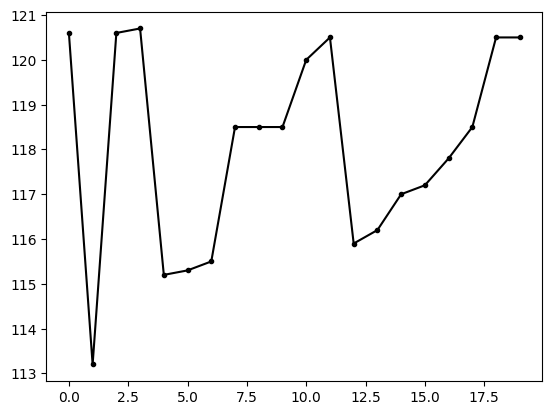

In [11]:
#Критерий восходящих и нисходящих серий
import math
import matplotlib.pyplot as plt

def create_pos_neg(x:list)->list:
    posNeg = []
    for i in range(len(x)-1):
        if (x[i+1] - x[i]>0):
            posNeg.append("+")
        elif (x[i+1] -x[i]<0):
            posNeg.append("-")
        #else:
            #print("x[i]=med")
    #print(len(posNeg))
    #print(len(x))
    return posNeg
    
def criterion1(v: int, k: int, n: int):
    f1 = int(((2*n-1)/3)-1.96*math.sqrt((16*n-29)/90))
    print(((2*n-1)/3)-1.96*math.sqrt((16*n-29)/90))
    if n<=26:
        f2=5
    elif 26<n<=153:
        f2=6
    else:
        f2=7
    print(v, f1, sep=" ")
    print(k, f2, sep=" ")
    if v < f1:
        return False
    elif k > f2:
        return False
    else:
        return True
x = [120.6, 113.2,  120.6, 120.7, 115.2, 115.3, 115.5,  118.5, 118.5,
     118.5, 120, 120.5, 115.9, 116.2, 117, 117.2, 117.8, 118.5, 120.5, 120.5]
print(x)
posNeg=create_pos_neg(x)
print(posNeg)
v = countSeries(posNeg)
kMax = longer_series(posNeg)
n = len(x)
if (criterion1(v, kMax, n) == True):
    print("Гипотеза о неизменности среднего значения временного ряда принимается, т.е. тренда нет")
else:
    print("Гипотеза о неизменности среднего значения временного ряда отвергается, т.е. тренд есть")

plt.plot([i for i in range(len(x))], x, "k-",
         [i for i in range(len(x))],x, "k.")
plt.show()


In [12]:
# Сравнение средних уровней ряда
import math
import matplotlib.pyplot as plt
import statistics as st
import scipy.stats as stats
x = [120.6, 113.2,  120.6, 120.7, 115.2, 115.3, 115.5,  118.5, 118.5,
     118.5, 120, 120.5, 115.9, 116.2, 117, 117.2, 117.8, 118.5, 120.5, 120.5]
n = len(x)
print(n)
n1, n2 = 0, 0

if n % 2 == 0:
    n1 = int(n/2)
    n2 = int(n/2)
else:
    n1 = int(n//2)
    n2 = int(n//2+1)
print(n1, n2)

x1 = x[0:n1]
x2 = x[n1:]
# print(x1,"\n",x2)
avg1 = st.mean(x1)
avg2 = st.mean(x2)

print("avg1 =", avg1, "\navg2 =", avg2)

variance1 = st.variance(x1, avg1)
variance2 = st.variance(x2, avg2)

print("variance1 =", variance1, "\nvariance2 =", variance2)


fRasch = variance1/variance2
fTable = stats.f.ppf(1-0.05,n1,n2)
print("F rasch =",fRasch,"\nF tabl =",fTable)
p1 = False
if (fRasch < fTable):
    p1 = False
    print("Нет оснований отвергать нулевую гипотезу о равенстве дисперсий")
else:
    print("Нулевая гипотеза о равенстве дисперсий отвергается")
    p1 = True
tRasch = abs(avg1-avg2)/(math.sqrt((n1-1)*pow(variance1, 2)+(n2-1)
                                   * pow(variance2, 2)))*math.sqrt((n1*n2*(n1+n2-2))/(n1+n2))
print(tRasch)
tTable = stats.t.ppf(1-0.05/2,n)
print("T rasch =",tRasch,"\nT tabl =",tTable)
p2 = False
if abs(tRasch) < tTable:
    p2 = False
    print("Нет оснований отвергать нулевую гипотезу о равенстве средних")
else:
    print("Нулевая гипотеза о равенстве средних отвергается")
    p2 = True

if p1 and p2 ==True:
    print("Тренд есть")
else:
    print("Тренда нет")




20
10 10
avg1 = 117.66 
avg2 = 118.41
variance1 = 7.202666666666659 
variance2 = 3.4054444444444396
F rasch = 2.1150445365264776 
F tabl = 2.9782370160823213
Нет оснований отвергать нулевую гипотезу о равенстве дисперсий
0.29768595062448466
T rasch = 0.29768595062448466 
T tabl = 2.0859634472658364
Нет оснований отвергать нулевую гипотезу о равенстве средних
Тренда нет
